<a href="https://colab.research.google.com/github/Joniald/Colaboratory/blob/main/Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Medical Cost Personal Dataset

## The following data obtained from Kaggle, explain the cost of a small sample of USA population Medical Insurance Cost based on some attributes depicted on "Content".

In [69]:
data = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")

In [70]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Get inside

In [72]:
data.isna().sum()
# So...we don't need to clean our data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

male      676
female    662
Name: sex, dtype: int64


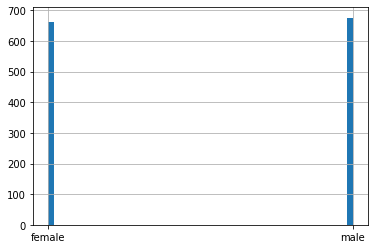

In [73]:
print(data.sex.value_counts())
data.sex.hist(bins=50)
# So....we don't need to be careful by Stratified our test group of data regarding the sex

no     1064
yes     274
Name: smoker, dtype: int64


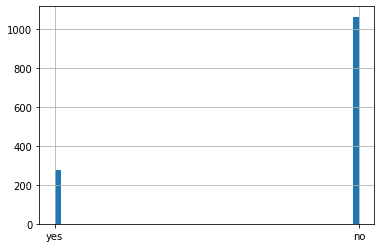

In [74]:
print(data.smoker.value_counts())
data.smoker.hist(bins=50)
# So....we  need to be careful by Stratified our test group of data regarding the smokers

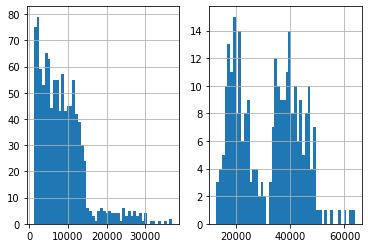

In [75]:
plt.subplot(1,2,1)
data.loc[data.smoker=="no"].charges.hist(bins=50)
plt.subplot(1,2,2)
data.loc[data.smoker == "yes"].charges.hist(bins=50)
# So...this is a very important feature and we need to be sure that it will be representive in the test group, in the same proportion as in total.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


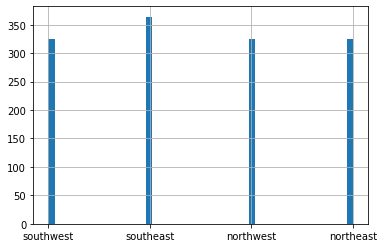

In [76]:
print(data.region.value_counts())
data.region.hist(bins=50)
# So....we don't need to be careful by Stratified our test group of data regarding the region

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


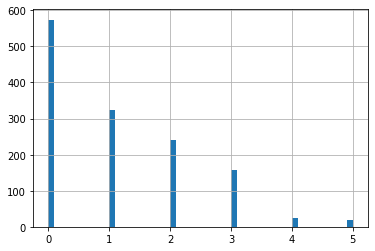

In [77]:
data.children.hist(bins=50)
print(data.children.value_counts())
# So....we need to be careful by Stratified our test group of data, regarding the number of childrens

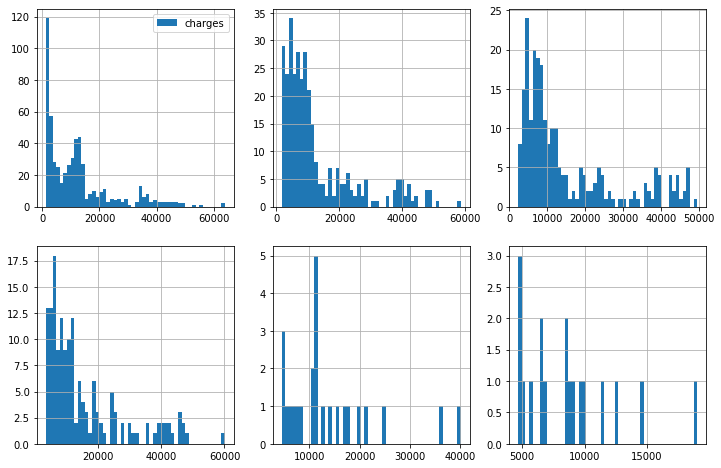

In [78]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
data.loc[data.children==0].charges.hist(bins=50, legend="Childrens 0")
plt.subplot(2,3,2)
data.loc[data.children==1].charges.hist(bins=50)
plt.subplot(2,3,3)
data.loc[data.children==2].charges.hist(bins=50)
plt.subplot(2,3,4)
data.loc[data.children==3].charges.hist(bins=50)
plt.subplot(2,3,5)
data.loc[data.children==4].charges.hist(bins=50)
plt.subplot(2,3,6)
data.loc[data.children==5].charges.hist(bins=50)
# It seems that the charge per nr of childrens has similar distribution. This meens that this feature is not so important regarding a proper split of data.

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


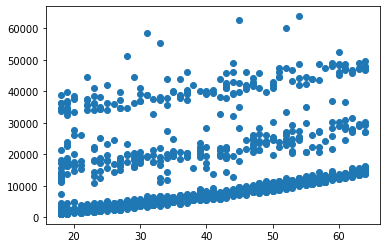

In [79]:
print(data.corr().charges[:-1])
# A relatively small correlation between the target value and the age
# We also dont have a correlation betwee the target value and the number of childrens.
plt.scatter(data.age, data.charges)
plt.show()

In [80]:
# We do stratified sampling based on the smoking behavior
from sklearn.model_selection import StratifiedShuffleSplit

splitData = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
print(splitData.get_n_splits(data,data.smoker))

for train_index, test_index in splitData.split(data, data.smoker):
  train_set = data.loc[train_index]
  test_set = data.loc[test_index]

print(test_set.smoker.value_counts())
print(train_set.smoker.value_counts())
print(data.smoker.value_counts())

1
no     213
yes     55
Name: smoker, dtype: int64
no     851
yes    219
Name: smoker, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


In [137]:
# Prepering data
X_train = train_set.drop(columns="charges")
Y_train = train_set.charges
X_test = test_set.drop(columns="charges")
Y_test = test_set.charges

In [138]:
X_train.head(), X_test.head()

(      age     sex     bmi  children smoker     region
 294    25    male  26.800         3     no  southwest
 179    41  female  33.155         3     no  northeast
 1335   18  female  36.850         0     no  southeast
 634    51    male  39.700         1     no  southwest
 67     40    male  26.315         1     no  northwest,
       age     sex     bmi  children smoker     region
 71     31    male  28.500         5     no  northeast
 434    31    male  28.595         1     no  northwest
 370    61  female  21.090         0     no  northwest
 44     38    male  37.050         1     no  northeast
 1039   19    male  27.265         2     no  northwest)

## Handling Text and Categorical Attributes and Feature Scaling

In [139]:
# OneHotEncode for text Attributes
X_train_set = pd.get_dummies(X_train)
X_train_set.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
294,25,26.800,3,0,1,1,0,0,0,0,1
179,41,33.155,3,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
634,51,39.700,1,0,1,1,0,0,0,0,1
67,40,26.315,1,0,1,1,0,0,1,0,0


In [140]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_set = scaler.fit_transform(X_train_set)
X_train_set[0:4]

array([[0.15217391, 0.29163304, 0.6       , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.5       , 0.46260425, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.56201238, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.63868711, 0.2       , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [141]:
# For later, when we have to evaluate our models
def oneHotNorm(X_test):
  X_test_set = pd.get_dummies(X_test)
  scalerTest = MinMaxScaler()
  X_test_set = scalerTest.fit_transform(X_test_set)
  return X_test_set 

## Select and Train a Model

In [105]:
print(X_train_set.shape)
print(Y_train.shape) 

(1070, 11)
(1070,)


In [106]:
import tensorflow as tf

In [128]:
model_01 = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(70, activation='relu'),
     tf.keras.layers.Dense(50, activation='relu'),
     tf.keras.layers.Dense(30, activation='relu'),
     tf.keras.layers.Dense(1)                          
])

model_01.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = tf.keras.metrics.mae
)

history = model_01.fit(X_train_set, Y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 13280.9111 - mean_absolute_error: 13280.9111
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13184.3223 - mean_absolute_error: 13184.3223
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 12085.5977 - mean_absolute_error: 12085.5977
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 8691.3438 - mean_absolute_error: 8691.3438
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 7757.7637 - mean_absolute_error: 7757.7637
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 7418.8687 - mean_absolute_error: 7418.8687
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 7017.4214 - mean_absolute_error: 7017.4214
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 6488.2969 - mean_absolute_error: 6488.2969
Epoch 9/300
34/34 [==============================] - 0s 2ms/step -

Text(0, 0.5, 'mean absolute error')

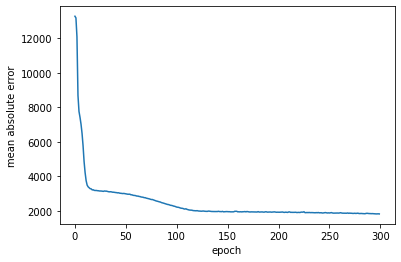

In [129]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("mean absolute error")

In [143]:
X_test = oneHotNorm(X_test)
model_01.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1953.3414 - mean_absolute_error: 1953.3414


[1953.3414306640625, 1953.3414306640625]

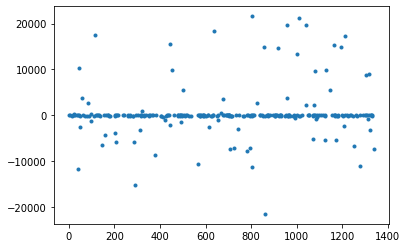

In [164]:
Y_predict = model_01.predict(X_test)
Y_predict = tf.squeeze(Y_predict, axis=-1)
plt.plot(Y_test-Y_predict,'.')